In [85]:
import pandas as pd
import numpy as np

import seaborn as sn
import matplotlib.pyplot as plt

from tqdm.auto import tqdm
# from tabulate import tabulate
from prettytable import PrettyTable
from math import ceil

In [86]:
df = pd.read_csv(r'D:\customer-churn\customer-churn\data\raw\insurance data.csv')

In [87]:
print(df.head().to_markdown())

|    |   age | sex    |    bmi |   children | smoker   |   Claim_Amount |   past_consultations |   num_of_steps |   Hospital_expenditure |   NUmber_of_past_hospitalizations |   Anual_Salary | region    |   charges |
|---:|------:|:-------|-------:|-----------:|:---------|---------------:|---------------------:|---------------:|-----------------------:|----------------------------------:|---------------:|:----------|----------:|
|  0 |    45 | male   | 28.7   |          2 | no       |        32993.8 |                   16 |         902022 |            8.64089e+06 |                                 1 |    9.43659e+07 | southwest |   8027.97 |
|  1 |    64 | male   | 34.5   |          0 | no       |        38448.4 |                    8 |         956604 |            1.10224e+07 |                                 1 |    2.30022e+08 | southwest |  13822.8  |
|  2 |    19 | female | 32.11  |          0 | no       |        50778.1 |                   15 |         758688 |            1.64263e+06

### `Age` column

In [88]:
print('\n The datatype of the `age` column.')
df['age'].dtype


 The datatype of the `age` column.


dtype('float64')

In [89]:
print("\n Short summary of the `age` column. \n")
print(df['age'].describe().to_markdown())


 Short summary of the `age` column. 

|       |       age |
|:------|----------:|
| count | 9935      |
| mean  |   39.0024 |
| std   |   13.9488 |
| min   |   18      |
| 25%   |   26      |
| 50%   |   39      |
| 75%   |   51      |
| max   |   64      |


##### `Removing null values`

In [90]:
print("Total null values in `age` column is",df['age'].isnull().sum(),".")
print("\nWe can replace the missing age values with its mean value.")

mean_age = df['age'].mean()

print(f'\nThe mean age is {mean_age:.2f}')

Total null values in `age` column is 73 .

We can replace the missing age values with its mean value.

The mean age is 39.00


In [91]:
df['age'].fillna(round(mean_age, 2), inplace=True)

C:\Users\sunil\AppData\Local\Temp\ipykernel_7792\175455821.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(round(mean_age, 2), inplace=True)


In [92]:
print("Null values in the `age` column is",df['age'].isnull().sum())

Null values in the `age` column is 0


##### `Removing outliers`

In [93]:
Y_labels = df['age'].values

X_labels = np.arange(len(Y_labels))

<function matplotlib.pyplot.show(close=None, block=None)>

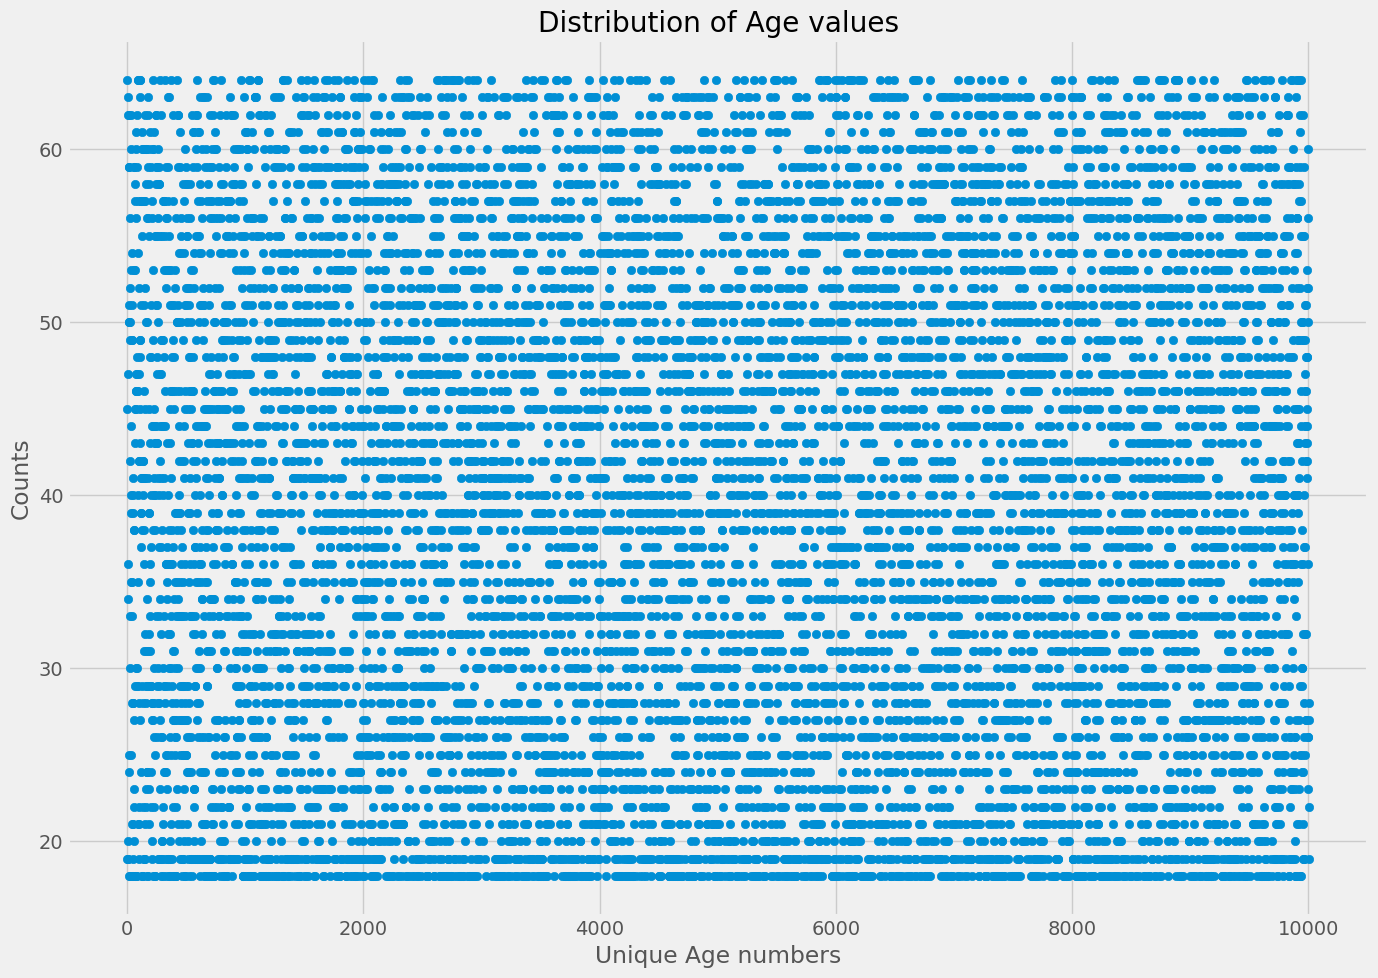

In [94]:
plt.style.use('fivethirtyeight')

plt.figure(figsize=(14, 10))

plt.scatter(X_labels,Y_labels)

plt.title('Distribution of Age values')
plt.xlabel('Unique Age numbers')
plt.ylabel('Counts')

plt.tight_layout()

plt.show

In [95]:
df['age'].value_counts()

age
18.00    534
19.00    491
39.00    265
46.00    234
21.00    233
38.00    230
44.00    223
41.00    221
55.00    220
29.00    219
48.00    217
28.00    215
26.00    215
27.00    215
51.00    215
24.00    213
47.00    212
50.00    210
45.00    209
40.00    205
25.00    205
54.00    205
49.00    203
33.00    203
22.00    202
23.00    200
30.00    199
56.00    197
58.00    197
20.00    194
42.00    194
31.00    193
34.00    192
32.00    191
36.00    190
57.00    189
52.00    189
59.00    187
53.00    184
63.00    177
35.00    177
37.00    175
43.00    167
60.00    161
62.00    156
64.00    151
61.00    134
Name: count, dtype: int64

In [96]:
print("\n Due to the limited variability in age values within the dataset, no outliers are present. \n")


 Due to the limited variability in age values within the dataset, no outliers are present. 



### `sex` column

In [97]:
df['sex'].dtype

dtype('O')

In [98]:
print(df['sex'].describe().to_markdown())

|        | sex    |
|:-------|:-------|
| count  | 10008  |
| unique | 2      |
| top    | female |
| freq   | 5032   |


In [99]:
print("In the `sex` column, the predominant value is `female`, occurring with a frequency of 5032.")

In the `sex` column, the predominant value is `female`, occurring with a frequency of 5032.


In [100]:
print("The null values in `sex` is",df['sex'].isnull().sum())

The null values in `sex` is 0


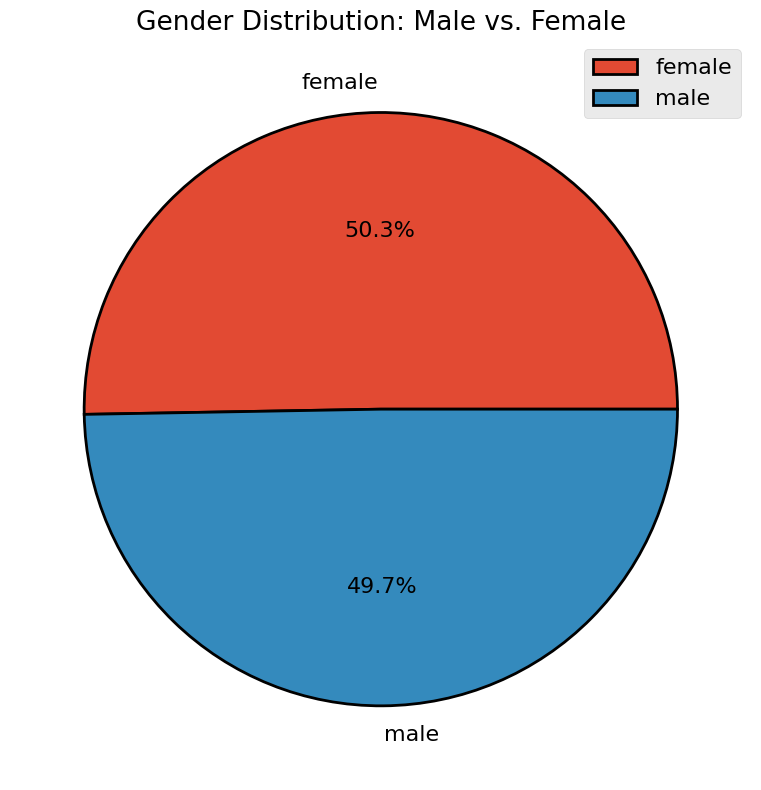


 The dataset included nearly equal numbers of male and female correspondents.


In [101]:
plt.style.use('ggplot')

plt.figure(figsize=(10, 8))

plt.pie(labels = df['sex'].value_counts().index,
        x = df['sex'].value_counts().values,
        autopct='%1.1f%%',
        textprops={'fontsize':16},
        wedgeprops={
                "edgecolor":"black",
                "linewidth":2,
                'antialiased':True
        })

plt.title('Gender Distribution: Male vs. Female',
          fontdict={'fontsize':19})

plt.legend(fontsize=16)

plt.tight_layout()

plt.show()

print("\n The dataset included nearly equal numbers of male and female correspondents.")

### `bmi` column

In [102]:
df['bmi'].dtype

dtype('float64')

In [103]:
print(df['bmi'].describe().to_markdown())

|       |        bmi |
|:------|-----------:|
| count | 9984       |
| mean  |   30.4352  |
| std   |    6.11251 |
| min   |   15.96    |
| 25%   |   26.125   |
| 50%   |   30.03    |
| 75%   |   34.32    |
| max   |   53.13    |


In [104]:
print('''\n According to the World Health Organization (WHO), a healthy BMI range for adults is typically between 18.5 and 24.9.
BMI values significantly below 16.0 are considered life-threatening, often indicating severe malnutrition or other serious health conditions.
In our dataset, the minimum recorded BMI is 15.96, highlighting that some respondents are in a critically unfit state.''')


 According to the World Health Organization (WHO), a healthy BMI range for adults is typically between 18.5 and 24.9.
BMI values significantly below 16.0 are considered life-threatening, often indicating severe malnutrition or other serious health conditions.
In our dataset, the minimum recorded BMI is 15.96, highlighting that some respondents are in a critically unfit state.


##### `Replacing the Nan values`

In [105]:
df['bmi'].isnull().sum()

24

In [106]:
print("\n The null values in BMI column are", df['bmi'].isnull().sum())

mean_bmi = df['bmi'].mean()

print(f"\n The mean of BMI in the dataset is `{mean_bmi:.2f}`")

print("\n\t Replacing the Nan values with mean..... ")

df['bmi'].fillna(round(mean_bmi, 2), inplace=True)

print("\n The null values in BMI column are", df['bmi'].isnull().sum())


 The null values in BMI column are 24

 The mean of BMI in the dataset is `30.44`

	 Replacing the Nan values with mean..... 

 The null values in BMI column are 0


C:\Users\sunil\AppData\Local\Temp\ipykernel_7792\909092303.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(round(mean_bmi, 2), inplace=True)


##### `checking for outliers`

In [107]:
Y_values_bmi = df['bmi'].values

X_values_bmi = np.arange(len(Y_values_bmi))

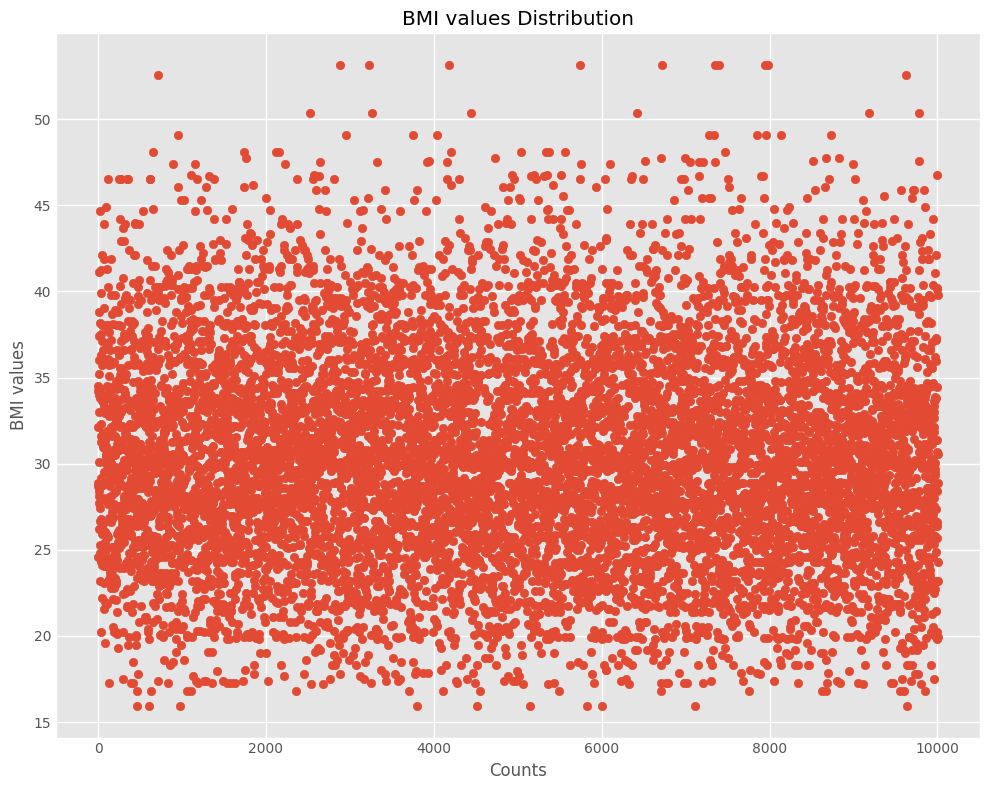

In [108]:
plt.style.use('ggplot')

plt.figure(figsize=(10, 8))

plt.scatter(x = X_values_bmi,
            y = Y_values_bmi)

plt.title('BMI values Distribution')
plt.xlabel("Counts")
plt.ylabel("BMI values")

plt.tight_layout()

plt.show()

In [109]:
print("\n The scatter plot shows that we have some outliers towards the upper ends and lower ends of the value.")


 The scatter plot shows that we have some outliers towards the upper ends and lower ends of the value.


In [110]:
threshold_max = 45
threshold_min = 18.5

X_above_values = []
Y_above_values = []

X_normal_values = []
Y_normal_values = []

X_below_values = []
Y_below_values = []

for i in tqdm(range(len(Y_values_bmi))):
    if Y_values_bmi[i] > threshold_max:
        X_above_values.append(i)
        Y_above_values.append(Y_values_bmi[i])

    elif Y_values_bmi[i] < threshold_min:
        X_below_values.append(i)
        Y_below_values.append(Y_values_bmi[i])

    else:
        X_normal_values.append(i)
        Y_normal_values.append(Y_values_bmi[i])

print("\n The number of BMI values greater than upper threshold are", len(Y_above_values))
print(f" They consitute {((len(Y_above_values)/df.shape[0]) * 100):.2f} %")

print("\n The number of normal BMI values", len(Y_normal_values))

print("\n The number of BMI values lower than lower threshold are", len(Y_below_values))
print(f" They consitute {((len(Y_below_values)/df.shape[0]) * 100):.2f} %")


100%|██████████| 10008/10008 [00:00<00:00, 2003751.70it/s]


 The number of BMI values greater than upper threshold are 145
 They consitute 1.45 %

 The number of normal BMI values 9713

 The number of BMI values lower than lower threshold are 150
 They consitute 1.50 %


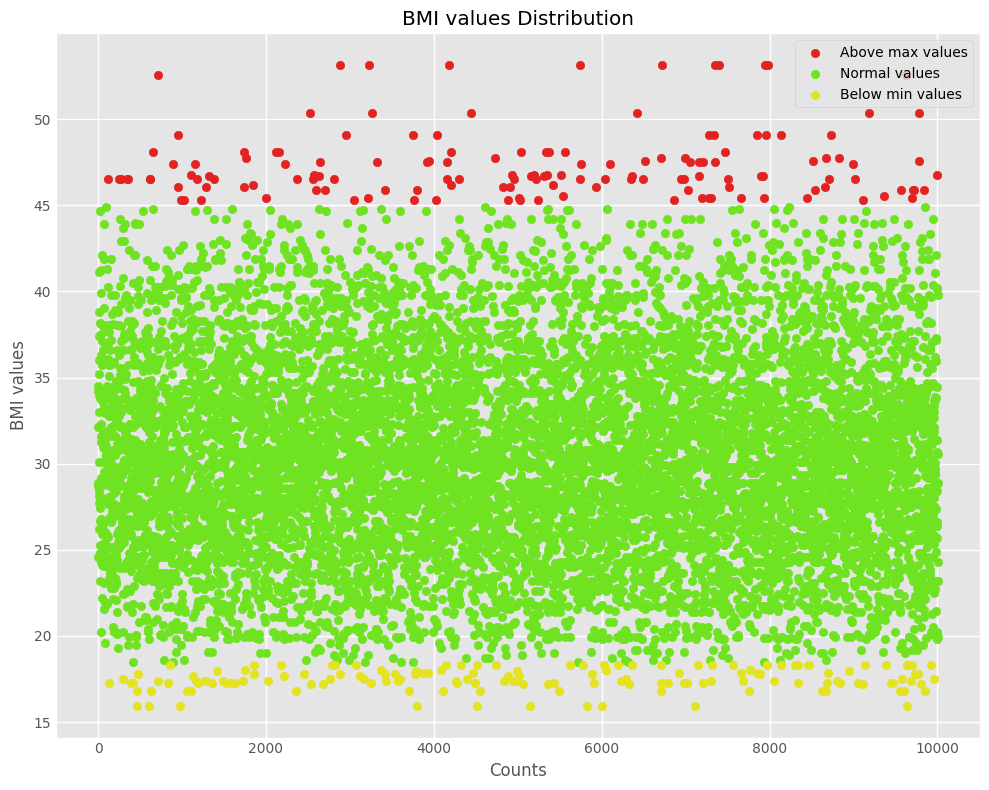

In [111]:
plt.style.use('ggplot')

plt.figure(figsize=(10, 8))

plt.scatter(x = X_above_values,
            y = Y_above_values,
            color='#E32222',
            label = "Above max values")

plt.scatter(x = X_normal_values,
            y = Y_normal_values,
            color = '#6FE322',
            label='Normal values')

plt.scatter(x = X_below_values,
            y = Y_below_values,
            color = '#E3E322',
            label='Below min values')

plt.title('BMI values Distribution')
plt.xlabel("Counts")
plt.ylabel("BMI values")

plt.legend()

plt.tight_layout()

plt.show()

In [112]:
df1 = df[df['bmi'] < threshold_max]
df1.shape

(9863, 13)

In [113]:
df2 = df1[df1['bmi'] > threshold_min]
df2.shape

(9705, 13)

In [114]:
df2.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'Claim_Amount',
       'past_consultations', 'num_of_steps', 'Hospital_expenditure',
       'NUmber_of_past_hospitalizations', 'Anual_Salary', 'region', 'charges'],
      dtype='object')

### `children` column

In [115]:
df2['children'].dtype

dtype('float64')

In [116]:
print(df2['children'].value_counts().to_markdown())

|   children |   count |
|-----------:|--------:|
|          0 |    4279 |
|          1 |    2335 |
|          2 |    1638 |
|          3 |    1120 |
|          4 |     181 |
|          5 |     107 |


##### `Replacing Nan Values`

In [117]:
df2['children'].isnull().sum()

45

In [118]:
print(f"\n The number of Nan values are {df2['children'].isnull().sum()}.")

mode_children = df2['children'].mode()

print(f'\n The maximum occuring values is {mode_children.values[0]:.0f} childrens.')

print(f'\n Replacing the Nan values with mode of number of children .... ')

df2['children'].fillna(ceil(mode_children), inplace=True)

print(f"\n The number of Nan values are {df2['children'].isnull().sum()}.")


 The number of Nan values are 45.

 The maximum occuring values is 0 childrens.

 Replacing the Nan values with mode of number of children .... 

 The number of Nan values are 0.


C:\Users\sunil\AppData\Local\Temp\ipykernel_7792\2969885779.py:9: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  df2['children'].fillna(ceil(mode_children), inplace=True)
C:\Users\sunil\AppData\Local\Temp\ipykernel_7792\2969885779.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['children'].fillna(ceil(mode_children), inplace=True)
C:\Users\sunil\AppData\Local\Temp\ipykernel_7792\2969885779.py:9: SettingWithCopyWarning: 
A 

In [119]:
mode_children = df2['children'].mode()
mode_children.values[0]

0.0

In [120]:
print(f"\n Unqiue values for number of childrens are {sorted(df2['children'].unique())}.")
print(f"\n The data concerning the number of children a person can have appears to be satisfactory.")


 Unqiue values for number of childrens are [0.0, 1.0, 2.0, 3.0, 4.0, 5.0].

 The data concerning the number of children a person can have appears to be satisfactory.


In [121]:
df2.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'Claim_Amount',
       'past_consultations', 'num_of_steps', 'Hospital_expenditure',
       'NUmber_of_past_hospitalizations', 'Anual_Salary', 'region', 'charges'],
      dtype='object')

### `smoker` column

In [122]:
df2['smoker'].dtype

dtype('O')

In [123]:
df2['smoker'].isnull().sum()

0

In [124]:
print(df2['smoker'].value_counts().to_markdown())

| smoker   |   count |
|:---------|--------:|
| no       |    8296 |
| yes      |    1409 |


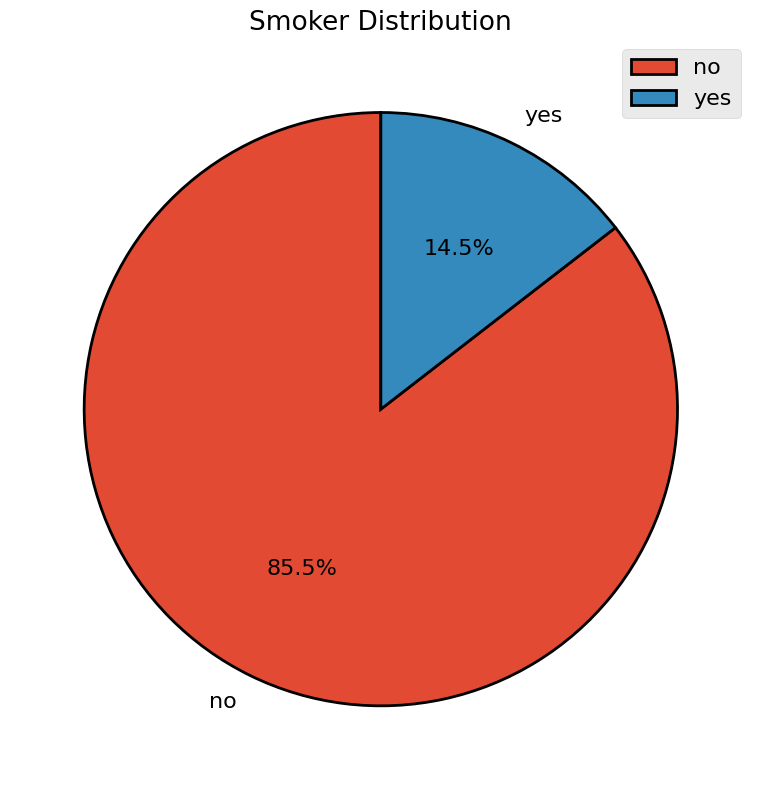

In [125]:
plt.style.use('ggplot')

plt.figure(figsize=(10, 8))

plt.pie(labels = df2['smoker'].value_counts().index,
        x = df2['smoker'].value_counts().values,
        autopct='%1.1f%%',
        textprops={'fontsize':16},
        wedgeprops={
                "edgecolor":"black",
                "linewidth":2,
                'antialiased':True
        },
        startangle=90)

plt.title('Smoker Distribution',
          fontdict={'fontsize':19})

plt.legend(fontsize=16)

plt.tight_layout()

plt.show()

In [126]:
df2.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'Claim_Amount',
       'past_consultations', 'num_of_steps', 'Hospital_expenditure',
       'NUmber_of_past_hospitalizations', 'Anual_Salary', 'region', 'charges'],
      dtype='object')

### `Claim_Amount` column

In [127]:
df2['Claim_Amount'].dtype

dtype('float64')

In [128]:
print(df2['Claim_Amount'].describe().to_markdown())

|       |   Claim_Amount |
|:------|---------------:|
| count |        9606    |
| mean  |       32275.9  |
| std   |       15109.2  |
| min   |        1920.14 |
| 25%   |       19683.1  |
| 50%   |       33019.4  |
| 75%   |       44184.7  |
| max   |       77278    |


##### `Replacing the Nan values`

In [129]:
print(f"\n The number of Nan values are {df2['Claim_Amount'].isnull().sum()}")

mean_claim_amt = df2['Claim_Amount'].mean()

print(f"\n The average amount claimed by an individual is {mean_claim_amt:.2f}")

print(f"\n Replacing the Nan values ..... ")

df2['Claim_Amount'].fillna(round(mean_claim_amt, 2), inplace=True)

print(f"\n The number of Nan values are {df2['Claim_Amount'].isnull().sum()}")


 The number of Nan values are 99

 The average amount claimed by an individual is 32275.86

 Replacing the Nan values ..... 

 The number of Nan values are 0


C:\Users\sunil\AppData\Local\Temp\ipykernel_7792\1816526108.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['Claim_Amount'].fillna(round(mean_claim_amt, 2), inplace=True)
C:\Users\sunil\AppData\Local\Temp\ipykernel_7792\1816526108.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Claim_Amount'].fillna(round(mean_claim_amt, 2), i

##### `Removing the outliers`

In [130]:
Y_claim_values = df2['Claim_Amount'].values

X_claim_values = np.arange(len(Y_claim_values))

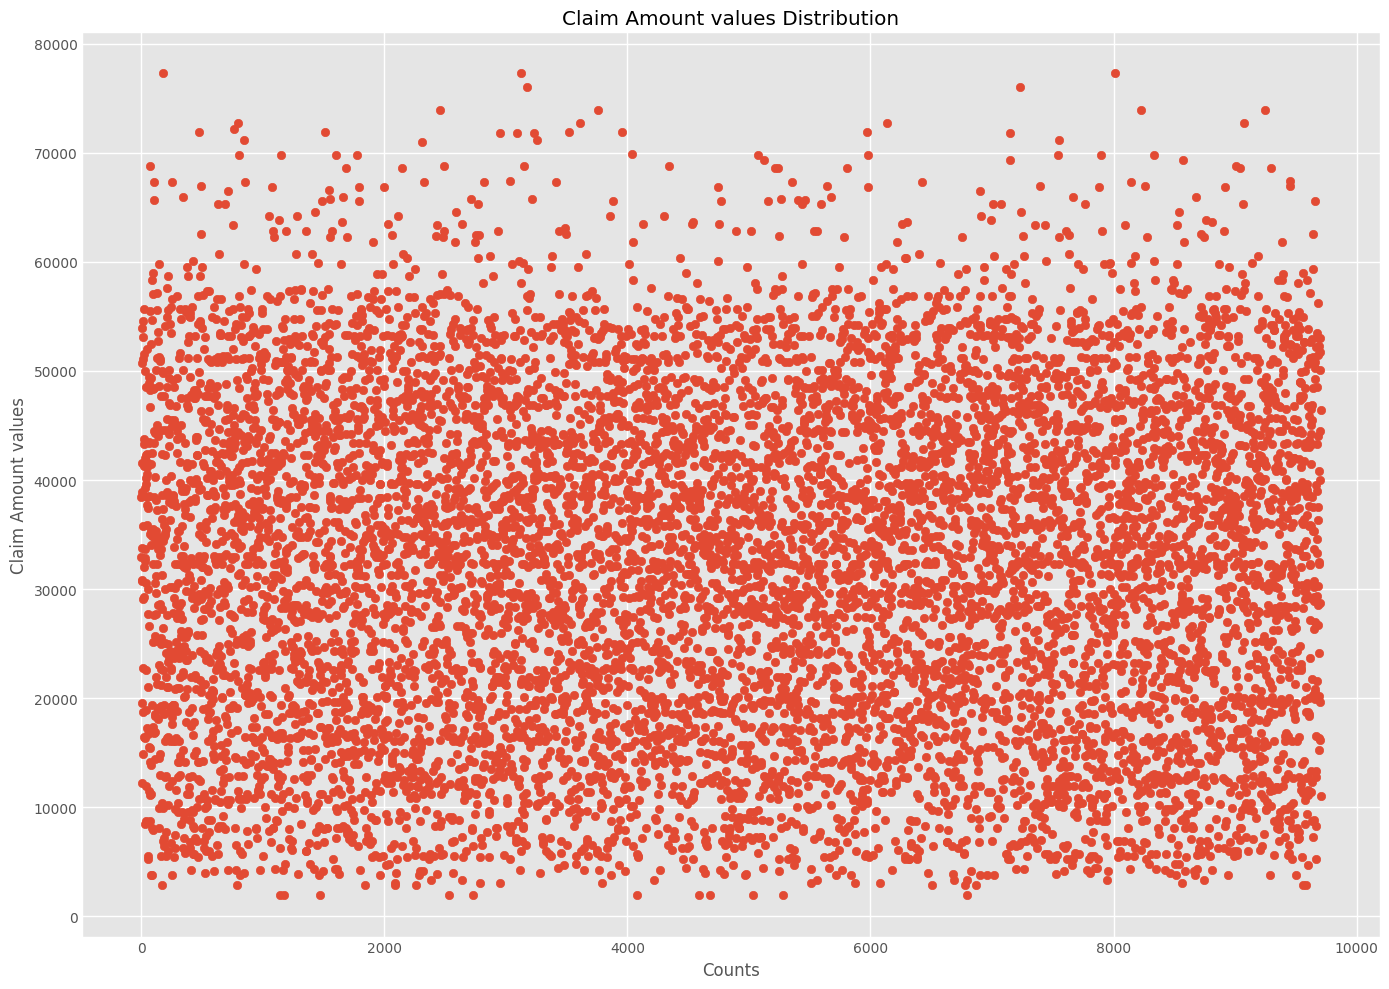

In [131]:
plt.style.use('ggplot')

plt.figure(figsize=(14, 10))

plt.scatter(x = X_claim_values,
            y = Y_claim_values)

plt.title('Claim Amount values Distribution')
plt.xlabel("Counts")
plt.ylabel("Claim Amount values")

plt.tight_layout()

plt.show()

In [132]:
threshold_min = 4500
threshold_max = 61000

X_above_claim_values = []
Y_above_claim_values = []

X_normal_claim_values = []
Y_normal_claim_values = []

X_below_claim_values = []
Y_below_claim_values = []

for i in tqdm(range(len(Y_claim_values))):
    if Y_claim_values[i] > threshold_max:
        X_above_claim_values.append(i)
        Y_above_claim_values.append(Y_claim_values[i])

    elif Y_claim_values[i] < threshold_min:
        X_below_claim_values.append(i)
        Y_below_claim_values.append(Y_claim_values[i])

    else:
        X_normal_claim_values.append(i)
        Y_normal_claim_values.append(Y_claim_values[i])

print("\n The number of claim values greater than upper threshold are", len(Y_above_claim_values))
print(f" They consitute {((len(Y_above_claim_values)/df2.shape[0]) * 100):.2f} %")

print("\n The number of normal claim values", len(Y_normal_claim_values))

print("\n The number of claim values lower than lower threshold are", len(Y_below_claim_values))
print(f" They consitute {((len(Y_below_claim_values)/df2.shape[0]) * 100):.2f} %")


100%|██████████| 9705/9705 [00:00<00:00, 1076700.00it/s]


 The number of claim values greater than upper threshold are 176
 They consitute 1.81 %

 The number of normal claim values 9413

 The number of claim values lower than lower threshold are 116
 They consitute 1.20 %


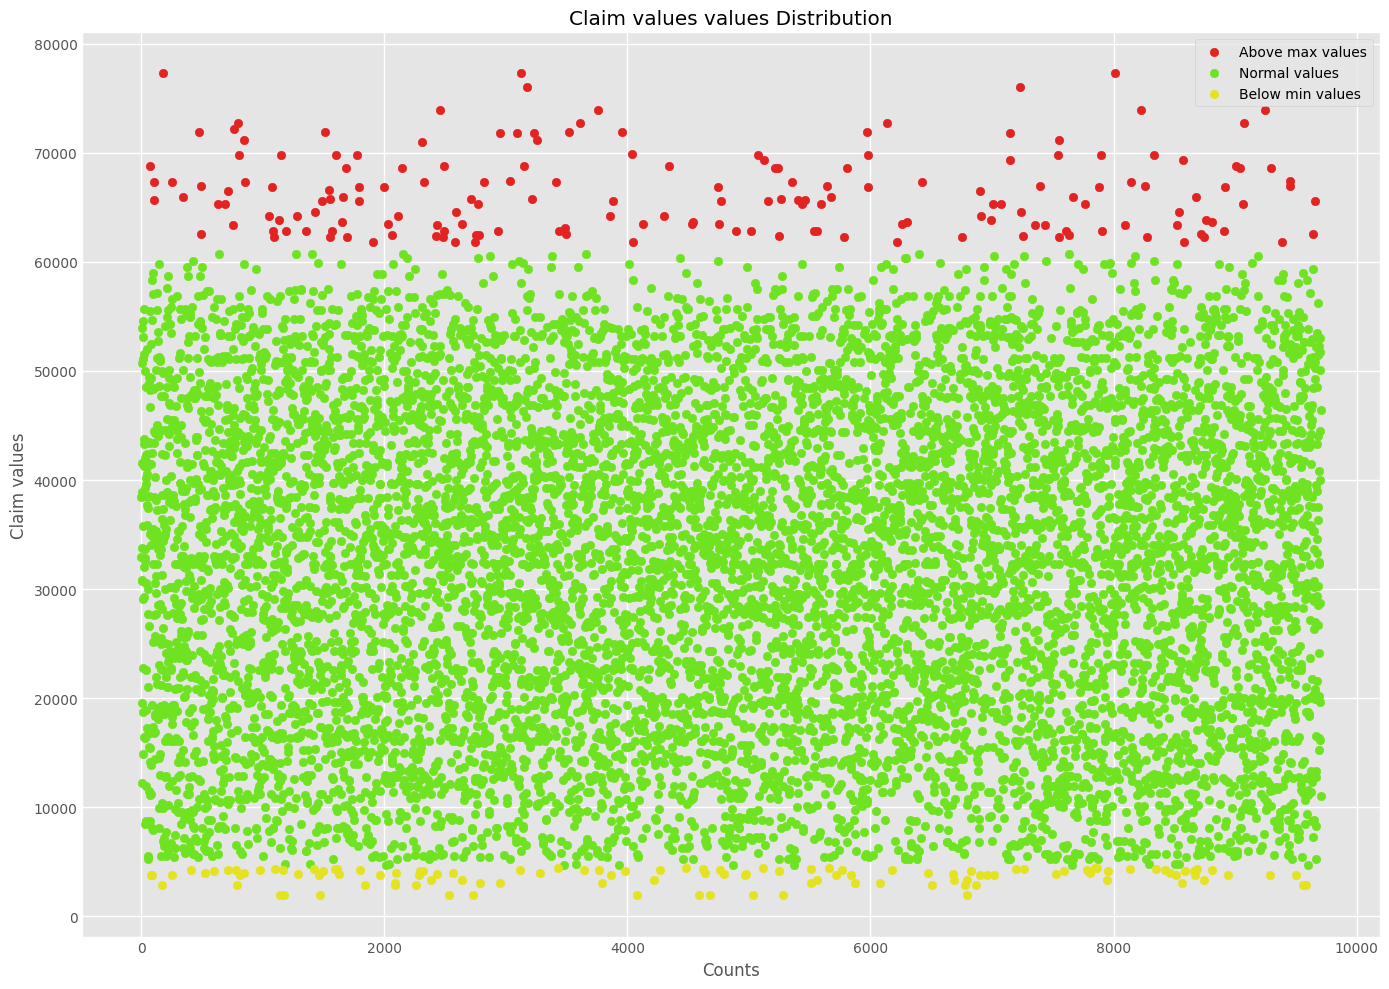

In [133]:
plt.style.use('ggplot')

plt.figure(figsize=(14, 10))

plt.scatter(x = X_above_claim_values,
            y = Y_above_claim_values,
            color='#E32222',
            label = "Above max values")

plt.scatter(x = X_normal_claim_values,
            y = Y_normal_claim_values,
            color = '#6FE322',
            label='Normal values')

plt.scatter(x = X_below_claim_values,
            y = Y_below_claim_values,
            color = '#E3E322',
            label='Below min values')

plt.title('Claim values values Distribution')
plt.xlabel("Counts")
plt.ylabel("Claim values")

plt.legend()

plt.tight_layout()

plt.show()

In [134]:
df3 = df2[df2['Claim_Amount'] < threshold_max]

In [135]:
df4 = df3[df3['Claim_Amount'] > threshold_min]

In [136]:
df4.shape

(9413, 13)

In [137]:
df4.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'Claim_Amount',
       'past_consultations', 'num_of_steps', 'Hospital_expenditure',
       'NUmber_of_past_hospitalizations', 'Anual_Salary', 'region', 'charges'],
      dtype='object')

### `past_consultations` column

In [138]:
df4['past_consultations'].dtype

dtype('float64')

In [139]:
df4['past_consultations'].describe()

count   9383.00
mean      14.34
std        6.80
min        1.00
25%        9.00
50%       14.00
75%       19.00
max       38.00
Name: past_consultations, dtype: float64

There could be various reasons why a person seeks insurance consultation, including:

1. **Need for a New Insurance Policy**: Individuals often seek advice when they are in need of a new insurance policy. This could involve exploring different plans and options available to them.

2. **Updates and Modifications**: Changes in life circumstances, such as family growth or emerging needs, may prompt individuals to update or modify their existing insurance policies. They may seek consultation to understand how best to adapt their coverage.

3. **Claims and Coverage**: In the event of emergencies or unforeseen incidents, individuals may file claims with insurance companies or seek consultation regarding their coverage. This could involve understanding what is covered by their policy and how to proceed with claims.

Among these reasons, the relationship with our target variable (charges) is not explicitly clear for the "Claims and Coverage" aspect. Since this reason does not directly relate to the charges individuals incur, we may consider dropping this column from our analysis.


In [140]:
df5 = df4.drop(['past_consultations'], axis='columns')

In [141]:
df5.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'Claim_Amount',
       'num_of_steps', 'Hospital_expenditure',
       'NUmber_of_past_hospitalizations', 'Anual_Salary', 'region', 'charges'],
      dtype='object')

### `num_of_steps` column

In [142]:
df5['num_of_steps'].dtype

dtype('float64')

In [143]:
pd.options.display.float_format = '{:.2f}'.format
df5['num_of_steps'].describe()

count      9389.00
mean     896106.33
std       81934.77
min      699157.00
25%      843105.00
50%      903769.00
75%      947881.00
max     1107872.00
Name: num_of_steps, dtype: float64

In [144]:
df5['num_of_steps'].iloc[:10]

0   902022.00
1   956604.00
2   758688.00
3   879560.00
4   793026.00
5   831945.00
6   890622.00
7   952855.00
8   771833.00
9   765577.00
Name: num_of_steps, dtype: float64

The number of steps taken by claim holders is unlikely to directly influence the charges included in insurance claim settlements for several reasons:

1. **Medical Expenses**: Insurance claim settlements predominantly encompass medical expenses, treatments, and related costs associated with the injury or illness. The number of steps taken by the claimant is generally unrelated to these medical costs.

2. **Legal Liability**: Settlement amounts are typically determined based on legal assessments of liability, the extent of injury, and relevant insurance policies. The claimant's activity level, such as the number of steps taken, is not a primary factor in these legal determinations.

3. **Actuarial Calculations**: Insurance companies utilize actuarial methods, which rely on historical data and risk assessments, to calculate claim amounts. These calculations focus on factors such as the nature of the injury, the claimant's medical history, and demographic data, rather than individual activity levels like steps.

Given these reasons, it's reasonable to conclude that the number of steps taken by claim holders does not directly impact the charges included in insurance claim settlements.

In [145]:
df6 = df5.drop(['num_of_steps'], axis='columns')

In [146]:
df6.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'Claim_Amount',
       'Hospital_expenditure', 'NUmber_of_past_hospitalizations',
       'Anual_Salary', 'region', 'charges'],
      dtype='object')

### `Hospital_expenditure` column

In [147]:
df6['Hospital_expenditure'].dtype

dtype('float64')

In [148]:
df6['Hospital_expenditure'].describe()

count        9383.00
mean     10160012.25
std      16240919.50
min         29452.53
25%       3706154.99
50%       6724448.98
75%       9550515.92
max     223644981.30
Name: Hospital_expenditure, dtype: float64

##### `Removing Nan Values`

In [149]:
df6['Hospital_expenditure'].isnull().sum()

30

In [150]:
print(f"\n Total Nan values are {df6['Hospital_expenditure'].isnull().sum()}")

mean_hos_expend = df6['Hospital_expenditure'].mean()

print(f"\n The mean expenditure is {mean_hos_expend:.2f}")

print(f"\n Removing the Nan values .....")

df6['Hospital_expenditure'].fillna(round(mean_hos_expend, 2), inplace=True)

print(f"\n Total Nan values are {df6['Hospital_expenditure'].isnull().sum()}")


 Total Nan values are 30

 The mean expenditure is 10160012.25

 Removing the Nan values .....

 Total Nan values are 0


C:\Users\sunil\AppData\Local\Temp\ipykernel_7792\3111637821.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df6['Hospital_expenditure'].fillna(round(mean_hos_expend, 2), inplace=True)


##### `Removing Outliers`

In [151]:
Y_hos_exp_val = df6['Hospital_expenditure'].values

X_hos_exp_val = np.arange(len(Y_hos_exp_val))

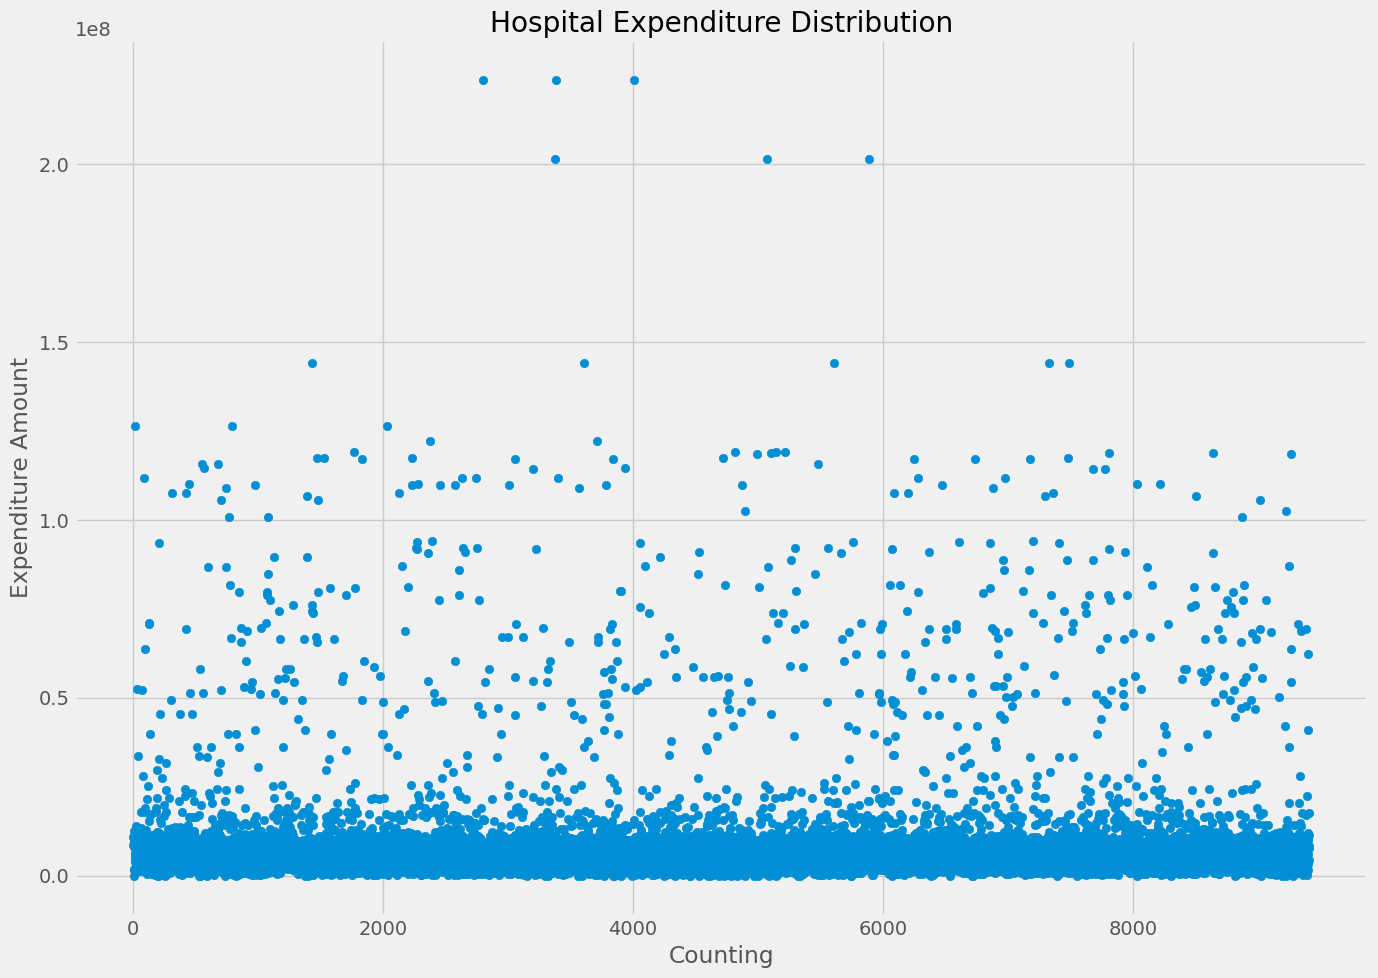

In [152]:
plt.style.use("fivethirtyeight")

plt.figure(figsize=(14, 10))

plt.scatter(x = X_hos_exp_val,
            y = Y_hos_exp_val)

plt.title('Hospital Expenditure Distribution')
plt.xlabel("Counting")
plt.ylabel("Expenditure Amount")
plt.tight_layout()

plt.show()


In [153]:
print("""\n From the scatter plot, it appears that discrepancies are present at the upper end of the expenditure values,
 whereas the lower end of the values seems to be consistent and within the expected range.""")


 From the scatter plot, it appears that discrepancies are present at the upper end of the expenditure values,
 whereas the lower end of the values seems to be consistent and within the expected range.


In [154]:
threshold_max = 60000000

X_hos_exp_above_val = []
Y_hos_exp_above_val = []

X_hos_exp_normal_val = []
Y_hos_exp_normal_val = []

for i in tqdm(range(len(Y_hos_exp_val))):
    if Y_hos_exp_val[i] > threshold_max:
        X_hos_exp_above_val.append(i)
        Y_hos_exp_above_val.append(Y_hos_exp_val[i])

    else:
        X_hos_exp_normal_val.append(i)
        Y_hos_exp_normal_val.append(Y_hos_exp_val[i])


print(f"\n The number of values greater than upper limit are {len(X_hos_exp_above_val)}")
print(f"\n They consitute {((len(X_hos_exp_above_val)/df6.shape[0]) * 100):.2f}")


print(f"\n The number of normal values {len(X_hos_exp_normal_val)}")

100%|██████████| 9413/9413 [00:00<00:00, 1048325.42it/s]


 The number of values greater than upper limit are 265

 They consitute 2.82

 The number of normal values 9148


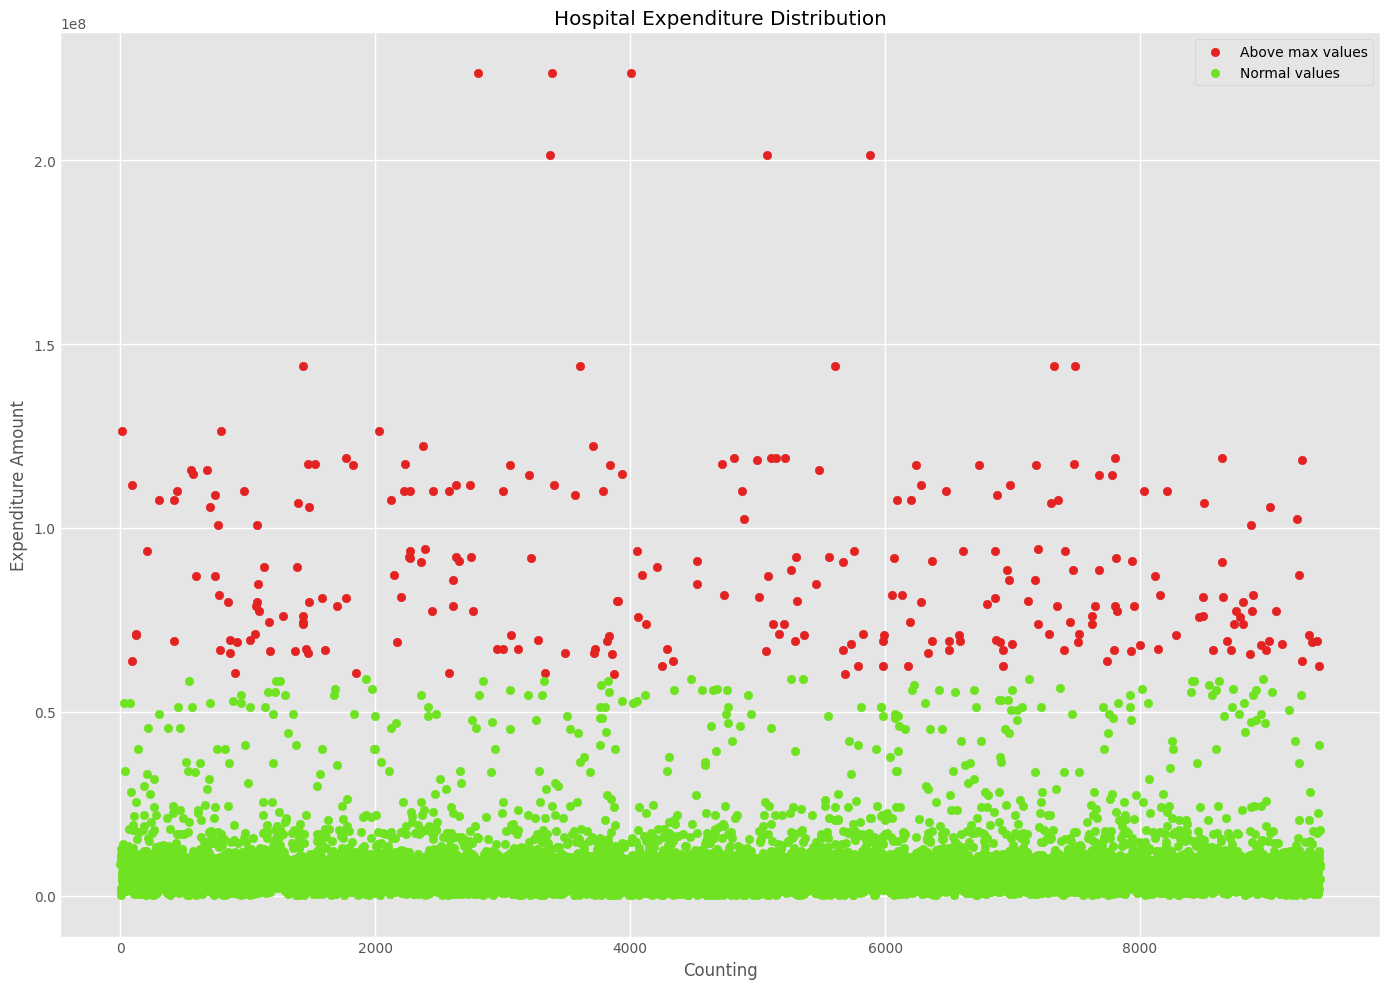

In [155]:
plt.style.use('ggplot')

plt.figure(figsize=(14, 10))

plt.scatter(x = X_hos_exp_above_val,
            y = Y_hos_exp_above_val,
            color='#E32222',
            label = "Above max values")

plt.scatter(x = X_hos_exp_normal_val,
            y = Y_hos_exp_normal_val,
            color = '#6FE322',
            label='Normal values')

plt.title('Hospital Expenditure Distribution')
plt.xlabel("Counting")
plt.ylabel("Expenditure Amount")

plt.legend()

plt.tight_layout()

plt.show()

In [156]:
df7 = df6[df6['Hospital_expenditure'] < threshold_max]
df7.shape

(9148, 11)

In [157]:
df7.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'Claim_Amount',
       'Hospital_expenditure', 'NUmber_of_past_hospitalizations',
       'Anual_Salary', 'region', 'charges'],
      dtype='object')

### `NUmber_of_past_hospitalizations` column

In [158]:
df7['NUmber_of_past_hospitalizations'].dtype

dtype('float64')

In [159]:
df7['NUmber_of_past_hospitalizations'].describe()

count   9148.00
mean       0.93
std        0.41
min        0.00
25%        1.00
50%        1.00
75%        1.00
max        2.00
Name: NUmber_of_past_hospitalizations, dtype: float64

In [160]:
df7['NUmber_of_past_hospitalizations'].isnull().sum()

0

The number of past hospitalizations can indeed have an effect on the charges levied on an insurance claim. Here are some key points to consider:

- **Risk Assessment and Premium Calculation:**
  - **Risk Profile:** Higher number of past hospitalizations indicates a higher risk of future medical issues, influencing charges and premiums.
  - **Underwriting:** Medical history, including past hospitalizations, is reviewed to determine insurance premiums and coverage limits.

- **Claim Processing and Charges:**
  - **Coverage Limits:** Frequent hospitalizations may result in higher charges within policy limits.
  - **Exclusions and Conditions:** Policies may have exclusions or higher deductibles for individuals with multiple past hospitalizations, affecting out-of-pocket charges.

Hence, this column will not get removed from the dataset.

In [161]:
df7.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'Claim_Amount',
       'Hospital_expenditure', 'NUmber_of_past_hospitalizations',
       'Anual_Salary', 'region', 'charges'],
      dtype='object')

### `Anual_Salary` column

In [162]:
df7['Anual_Salary'].dtype

dtype('float64')

In [163]:
df7['Anual_Salary'].describe()

count         9121.00
mean     193512355.73
std      225001498.62
min        3150786.26
25%       72551900.77
50%      122536472.80
75%      207952672.50
max     1680694434.00
Name: Anual_Salary, dtype: float64

##### `Removing Nan values` column

In [164]:
df7['Anual_Salary'].isnull().sum()

27

In [165]:
print(f"\n The number of null values are {df7['Anual_Salary'].isnull().sum()}")

mean_sal = df7['Anual_Salary'].mean()

print(f"\n The annual salary of Insurance Holder is {mean_sal:.2f}")

print(f"\n Removing null values from Anual_salary column .... ")

df7['Anual_Salary'].fillna(round(mean_sal,2), inplace=True)

print(f"\n The number of null values are {df7['Anual_Salary'].isnull().sum()}")



 The number of null values are 27

 The annual salary of Insurance Holder is 193512355.73

 Removing null values from Anual_salary column .... 

 The number of null values are 0


C:\Users\sunil\AppData\Local\Temp\ipykernel_7792\3859202468.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df7['Anual_Salary'].fillna(round(mean_sal,2), inplace=True)
C:\Users\sunil\AppData\Local\Temp\ipykernel_7792\3859202468.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df7['Anual_Salary'].fillna(round(mean_sal,2), inplace=True)


##### `Removing outliers`

In [166]:
Y_anl_sal_val = df7['Anual_Salary'].values

X_anl_sal_val = np.arange(len(Y_anl_sal_val))

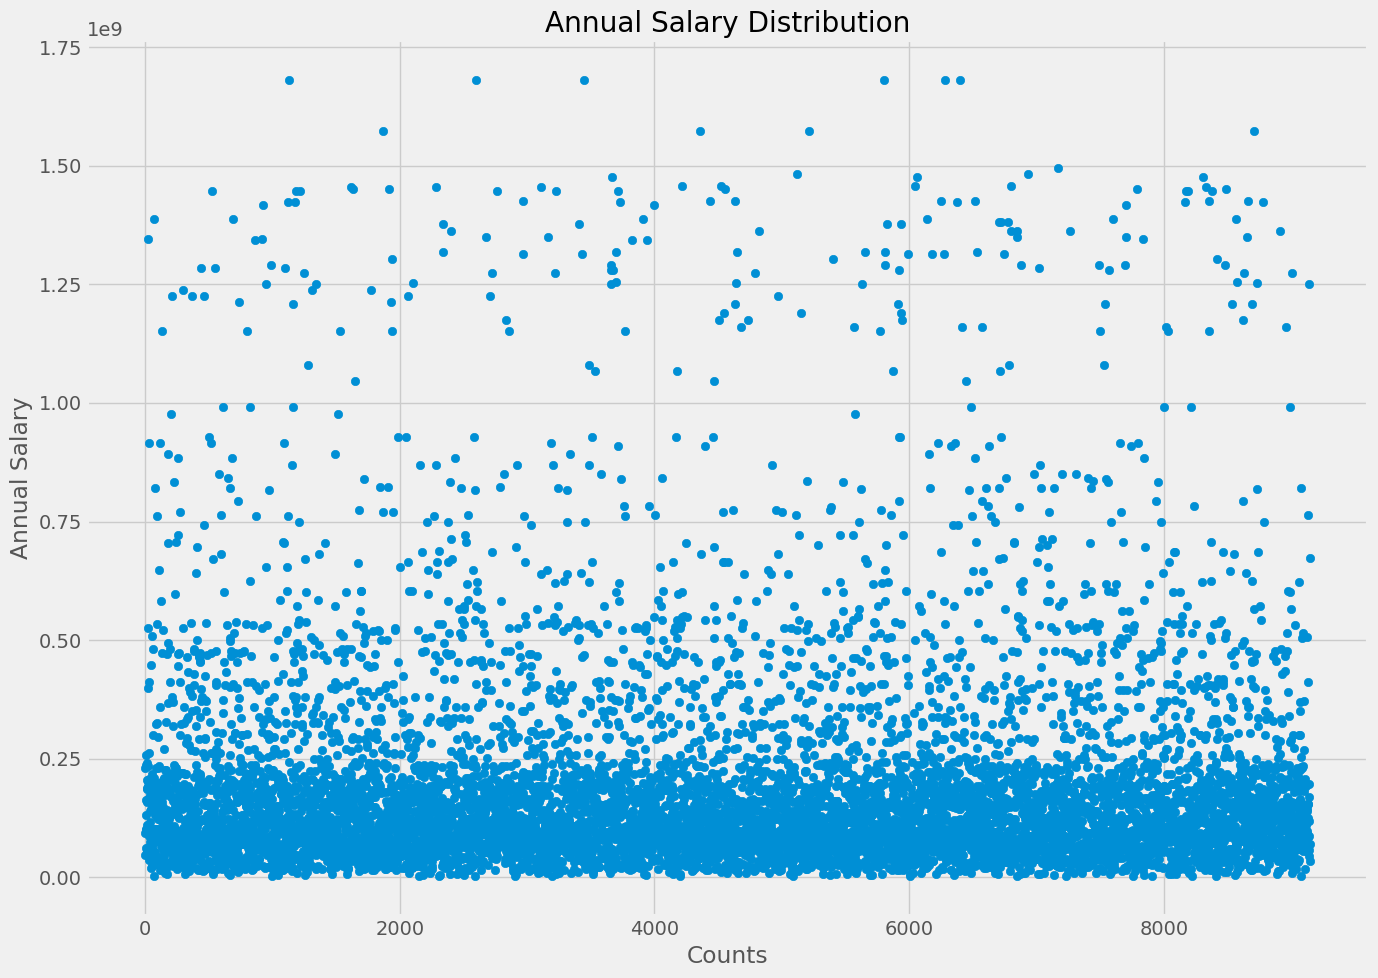

In [167]:
plt.style.use("fivethirtyeight")

plt.figure(figsize=(14, 10))

plt.scatter(y = Y_anl_sal_val,
            x = X_anl_sal_val)

plt.title("Annual Salary Distribution")
plt.xlabel("Counts")
plt.ylabel("Annual Salary")

plt.tight_layout()

plt.show()

In [168]:
threshold_max = 750000000

X_anl_sal_above_val = []
Y_anl_sal_above_val = []

X_anl_sal_normal_val = []
Y_anl_sal_normal_val = []

for i in tqdm(range(len(Y_anl_sal_val))):
    if Y_anl_sal_val[i] > threshold_max:
        X_anl_sal_above_val.append(i)
        Y_anl_sal_above_val.append(Y_anl_sal_val[i])

    else:
        X_anl_sal_normal_val.append(i)
        Y_anl_sal_normal_val.append(Y_anl_sal_val[i])


print(f"\n The number of values greater than upper limit are {len(X_anl_sal_above_val)}")
print(f"\n They consitute {((len(X_anl_sal_above_val)/df7.shape[0]) * 100):.2f}")


print(f"\n The number of normal values {len(Y_anl_sal_normal_val)}")

100%|██████████| 9148/9148 [00:00<00:00, 1028645.16it/s]


 The number of values greater than upper limit are 310

 They consitute 3.39

 The number of normal values 8838


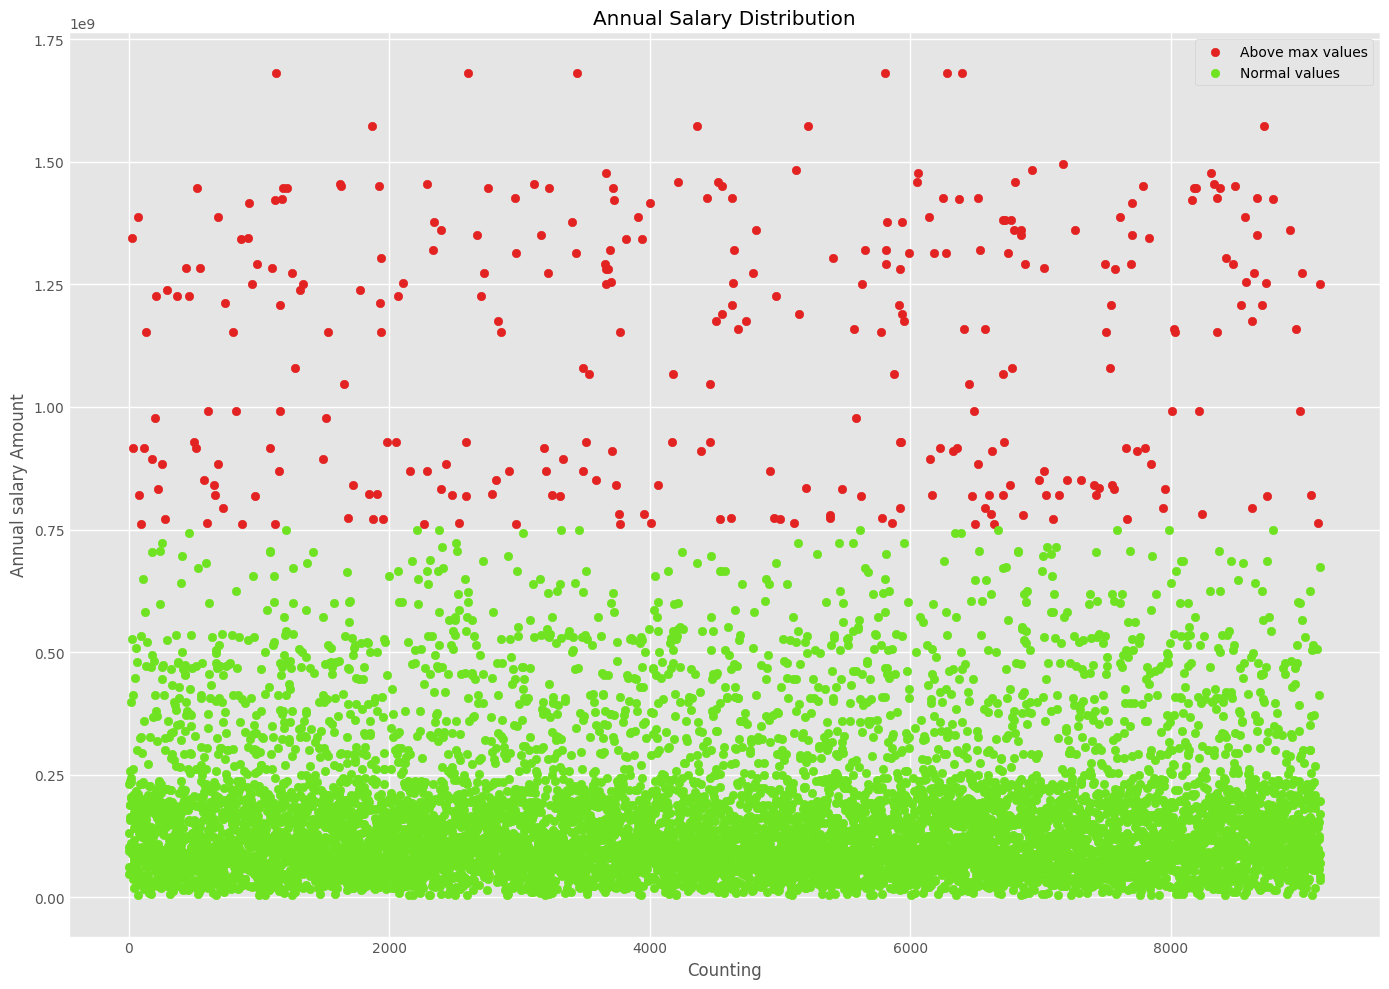

In [169]:
plt.style.use('ggplot')

plt.figure(figsize=(14, 10))

plt.scatter(x = X_anl_sal_above_val,
            y = Y_anl_sal_above_val,
            color='#E32222',
            label = "Above max values")

plt.scatter(x = X_anl_sal_normal_val,
            y = Y_anl_sal_normal_val,
            color = '#6FE322',
            label='Normal values')

plt.title('Annual Salary Distribution')
plt.xlabel("Counting")
plt.ylabel("Annual salary Amount")

plt.legend()

plt.tight_layout()

plt.show()

In [170]:
df8 = df7[df7['Anual_Salary'] < threshold_max]
df8.shape

(8838, 11)

In [171]:
df8.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'Claim_Amount',
       'Hospital_expenditure', 'NUmber_of_past_hospitalizations',
       'Anual_Salary', 'region', 'charges'],
      dtype='object')

### `region` column

In [172]:
df8['region'].dtype

dtype('O')

In [173]:
df8['region'].describe()

count          8838
unique            4
top       northwest
freq           2242
Name: region, dtype: object

In [174]:
df8['region'].isnull().sum()

0

- **Healthcare Costs by Region:**
  - **Cost of Living:** Higher costs of living lead to higher healthcare costs, resulting in increased insurance premiums and charges.
  - **Medical Infrastructure:** Regions with advanced medical facilities and specialized care have higher associated costs.

- **Insurance Market Dynamics:**
  - **Regional Risk Factors:** Higher prevalence of specific health risks in certain regions influences insurance costs.
  - **Regulatory Environment:** State or regional regulations affect insurance policies, premiums, and claim charges, with varying mandates for coverage.

- **Provider Networks:**
  - **In-Network vs. Out-of-Network:** Availability and density of in-network providers vary by region, with out-of-network services incurring higher charges.
  - **Negotiated Rates:** Insurance companies' negotiated rates with healthcare providers vary regionally, impacting claim costs.

- **Utilization Patterns:**
  - **Healthcare Utilization:** Regional differences in healthcare utilization, influenced by population health and local medical practices, affect insurance charges.

In summary, regional factors such as healthcare costs, insurance market dynamics, provider networks, and utilization patterns significantly influence the charges levied on insurance claims.

In [175]:
df8.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'Claim_Amount',
       'Hospital_expenditure', 'NUmber_of_past_hospitalizations',
       'Anual_Salary', 'region', 'charges'],
      dtype='object')

### `charges` column

In [176]:
df8['charges'].dtype

dtype('float64')

In [177]:
df8['charges'].describe()

count    8838.00
mean     8914.28
std      5691.50
min      1121.87
25%      4357.04
50%      8068.19
75%     12124.99
max     26392.26
Name: charges, dtype: float64

In [178]:
df8['charges'].isnull().sum()

0

In [179]:
df8.rename(columns={'charges':'target'}, inplace=True)

C:\Users\sunil\AppData\Local\Temp\ipykernel_7792\2315207472.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df8.rename(columns={'charges':'target'}, inplace=True)


In [180]:
df8.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'Claim_Amount',
       'Hospital_expenditure', 'NUmber_of_past_hospitalizations',
       'Anual_Salary', 'region', 'target'],
      dtype='object')

In [181]:
df8.to_csv('D:/customer-churn/customer-churn/data/clean/cleandata.csv', index=False)